In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 20s 0us/step


We split the test set into test and validation set (50-50)

In [4]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [5]:
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print()
print('Shape of x_test:  ', x_test.shape)
print('Shape of y_test:  ', y_test.shape)
print()
print('Shape of x_vali:  ', x_val.shape)
print('Shape of y_vali:  ', y_val.shape)

Shape of x_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 1)

Shape of x_test:   (5000, 32, 32, 3)
Shape of y_test:   (5000, 1)

Shape of x_vali:   (5000, 32, 32, 3)
Shape of y_vali:   (5000, 1)


Tensorflow models only accept the 1-dimension output, so it needs to be flattened. Besides, we also normalize the input dataset by dividing it by 255, which is the max value on the image.

In [6]:
x_train, x_test, x_val = x_train / 255.0, x_test / 255.0, x_val / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()
y_val = y_val.flatten()

In [7]:
print('Shape of x_train: ', x_train.shape)
print('Shape of y_train: ', y_train.shape)
print()
print('Shape of x_test:  ', x_test.shape)
print('Shape of y_test:  ', y_test.shape)
print()
print('Shape of x_vali:  ', x_val.shape)
print('Shape of y_vali:  ', y_val.shape)

Shape of x_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000,)

Shape of x_test:   (5000, 32, 32, 3)
Shape of y_test:   (5000,)

Shape of x_vali:   (5000, 32, 32, 3)
Shape of y_vali:   (5000,)


the "n_labels" contains the number of distinct labels in the dataset, which is represented as number (0, 1, 2, 3...). Considering each number as index, the variable "labels" contains the true name of that label.
This is collected from https://keras.io/api/datasets/cifar10/

In [8]:
n_labels = len(set(y_test))
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f'Number of labels: {n_labels}')
print(labels)

Number of labels: 10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [9]:
model = Sequential([
    Input(shape=x_train[0].shape),
    # First Convolutional Layers
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    # Second Convolutional Layers
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    # Third Convolutional Layers
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(units=1024, activation='relu'),
    Dropout(0.2),
    Dense(units=n_labels, activation='softmax')
])

We can utilize EarlyStopping class from keras by uncommenting. This helps the model to stop when the val_loss or val_accuracy does not improve after a certain number of epochs

In [10]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=40,
                    callbacks=[callback]
)

print(f"The Loss and Accuracy score on Traning data \t: [{history.history['loss'][-1]}, {history.history['accuracy'][-1]}]")
print(f"The Loss and Accuracy score on Testing data \t: [{history.history['val_loss'][-1]}, {history.history['val_accuracy'][-1]}]")

Epoch 1/40
1563/1563 [==============================] - 20s 8ms/step - loss: 1.3870 - accuracy: 0.5462 - val_loss: 1.0872 - val_accuracy: 0.6336
Epoch 2/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9106 - accuracy: 0.6942 - val_loss: 0.9453 - val_accuracy: 0.6866
Epoch 3/40
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7828 - accuracy: 0.7415 - val_loss: 0.8474 - val_accuracy: 0.7310
Epoch 4/40
1563/1563 [==============================] - 13s 9ms/step - loss: 0.6809 - accuracy: 0.7712 - val_loss: 0.7322 - val_accuracy: 0.7578
Epoch 5/40
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5902 - accuracy: 0.8014 - val_loss: 0.7095 - val_accuracy: 0.7640
Epoch 6/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5182 - accuracy: 0.8255 - val_loss: 0.6523 - val_accuracy: 0.7876
Epoch 7/40
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4558 - accuracy: 0.8473 - val_loss: 0.7354 - val_ac

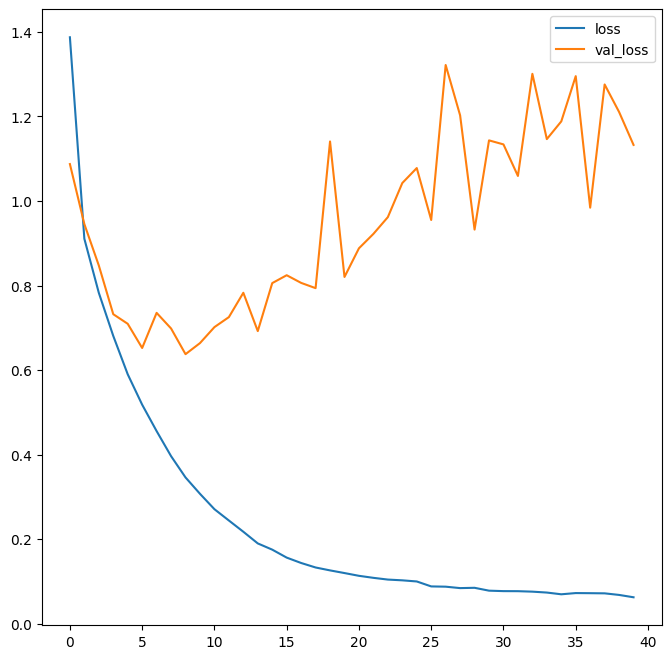

In [11]:
# Plot Losses
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

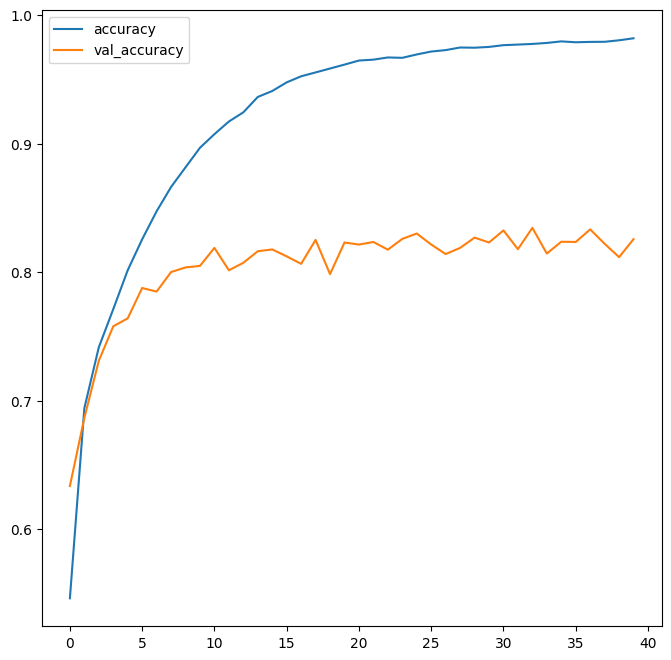

In [12]:
# Plot Accuracy
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [13]:
predictions = model.predict(x_test)
print(predictions.shape)

157/157 [==============================] - 1s 2ms/step
(5000, 10)


The predicted is in the form of probabilities of being corresponding labels evaluated by softmax function. We must only keep the label which is given the highest probability.

Confusion matrix, without normalization
[[418   3   5  10   6   1   0   5  24   7]
 [  5 449   0   1   1   5   4   1  10  10]
 [ 28   0 380  19  31  23  28   3   9   4]
 [  7   0  27 347  17  55  23  12   9   3]
 [  1   2  20  23 410  15  16  17   2   0]
 [  3   1  15  49  15 366   8  21   0   0]
 [  2   3  16  16   7   2 454   5   5   1]
 [  3   1   1  21  17   9   2 467   4   3]
 [ 13   4   3   1   1   3   2   2 457   3]
 [ 13  18   4   4   1   4   7   0  15 432]]



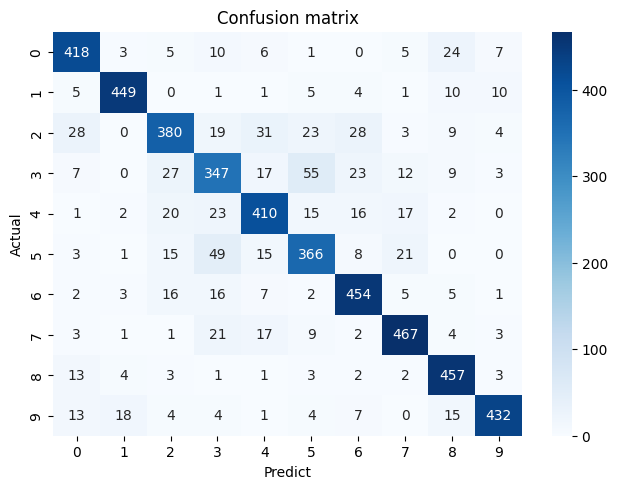

In [14]:
predictions = np.argmax(predictions, axis=1)

def plt_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print()
    sns.heatmap(cm, cmap=cmap, annot=True, fmt='d')
    plt.title(title)
    plt.tight_layout()
    plt.xlabel('Predict')
    plt.ylabel('Actual')

cm = confusion_matrix(y_test, predictions)
plt_confusion_matrix(cm)

In [15]:
#Classification Report
print(classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

    airplane       0.85      0.87      0.86       479
  automobile       0.93      0.92      0.93       486
        bird       0.81      0.72      0.76       525
         cat       0.71      0.69      0.70       500
        deer       0.81      0.81      0.81       506
         dog       0.76      0.77      0.76       478
        frog       0.83      0.89      0.86       511
       horse       0.88      0.88      0.88       528
        ship       0.85      0.93      0.89       489
       truck       0.93      0.87      0.90       498

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [16]:
# Evaluation with Keras training API
eval = model.evaluate(x=x_test, y=y_test)

157/157 [==============================] - 1s 4ms/step - loss: 1.1295 - accuracy: 0.8360


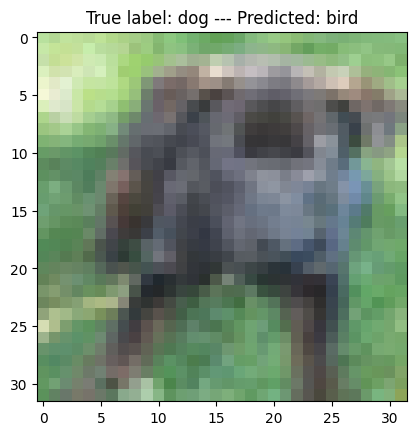

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s --- Predicted: %s" % (labels[y_test[i]], labels[predictions[i]]));

# DATA AUGMENTATION

We can improve model by applying data augmentation with Keras API.

In [18]:
from keras.preprocessing.image import ImageDataGenerator

We use the same model as above.

In [19]:
model = Sequential([
    Input(shape=x_train[0].shape),
    # First Convolutional Layers
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    # Second Convolutional Layers
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    # Third Convolutional Layers
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.2),
    Dense(units=1024, activation='relu'),
    Dropout(0.2),
    Dense(units=n_labels, activation='softmax')
])

In [20]:
batch_size = 32
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_generator = model.fit_generator(train_generator, validation_data=(x_val, y_val), steps_per_epoch=steps_per_epoch, epochs=40)

print()
print(f"The Loss and Accuracy score on Traning data \t: [{history_generator.history['loss'][-1]}, {history_generator.history['accuracy'][-1]}]")
print(f"The Loss and Accuracy score on Testing data \t: [{history_generator.history['val_loss'][-1]}, {history_generator.history['val_accuracy'][-1]}]")

Epoch 1/50


<ipython-input-20-108da856fc30>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_generator = model.fit_generator(train_generator, validation_data=(x_val, y_val), steps_per_epoch=steps_per_epoch, epochs=50)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


1562/1562 [==============================] - 45s 26ms/step - loss: 1.6442 - accuracy: 0.4210 - val_loss: 1.2326 - val_accuracy: 0.5524
Epoch 2/50
1562/1562 [==============================] - 40s 25ms/step - loss: 1.2577 - accuracy: 0.5550 - val_loss: 1.0887 - val_accuracy: 0.6216
Epoch 3/50
1562/1562 [==============================] - 41s 26ms/step - loss: 1.0717 - accuracy: 0.6253 - val_loss: 1.0411 - val_accuracy: 0.6420
Epoch 4/50
1562/1562 [==============================] - 40s 26ms/step - loss: 0.9617 - accuracy: 0.6683 - val_loss: 0.9269 - val_accuracy: 0.6920
Epoch 5/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.8830 - accuracy: 0.6970 - val_loss: 0.9785 - val_accuracy: 0.6826
Epoch 6/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.8257 - accuracy: 0.7178 - val_loss: 0.8019 - val_accuracy: 0.7374
Epoch 7/50
1562/1562 [==============================] - 38s 24ms/step - loss: 0.7702 - accuracy: 0.7363 - val_loss: 0.7616 - val_accura

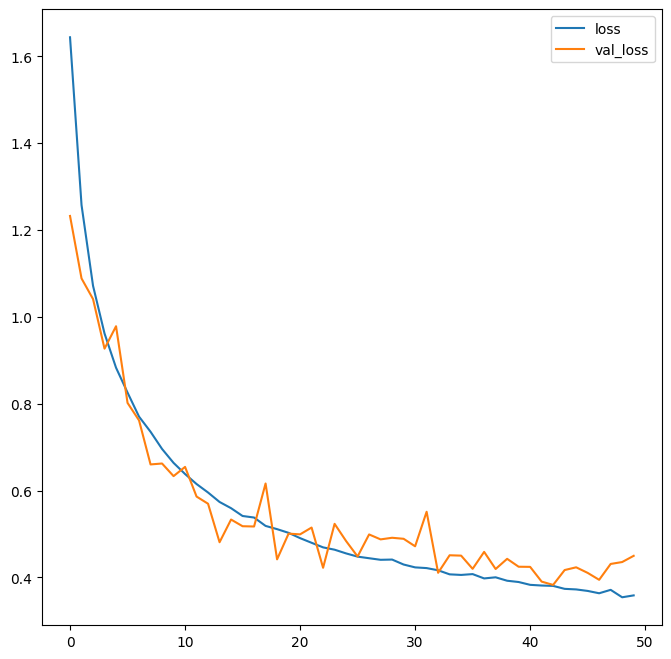

In [21]:
# Plot Losses
plt.figure(figsize=(8, 8))
plt.plot(history_generator.history['loss'], label='loss')
plt.plot(history_generator.history['val_loss'], label='val_loss')
plt.legend()

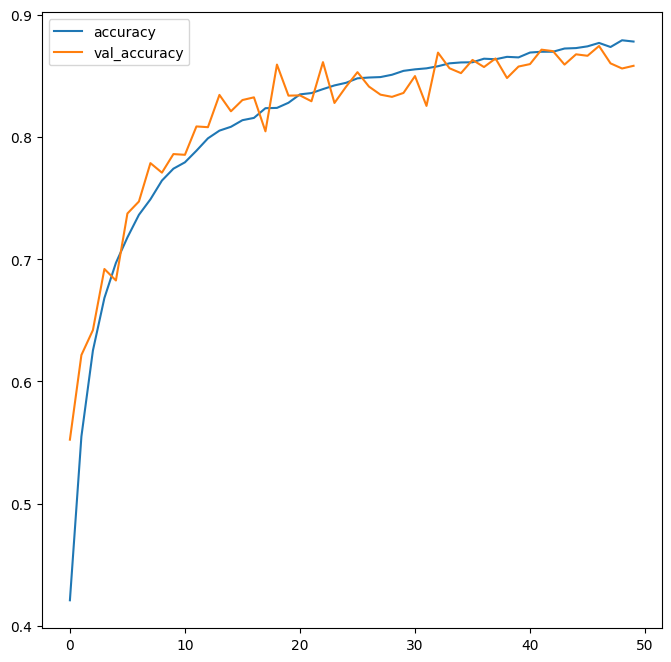

In [22]:
# Plot Accuracy
plt.figure(figsize=(8, 8))
plt.plot(history_generator.history['accuracy'], label='accuracy')
plt.plot(history_generator.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [23]:
predictions = model.predict(x_test)
print(predictions.shape)

157/157 [==============================] - 1s 3ms/step
(5000, 10)


Confusion matrix, without normalization
[[393   7  20   9   8   1   4   1  23  13]
 [  1 472   0   0   0   0   2   0   1  10]
 [  8   1 441  18  14   9  32   0   1   1]
 [  2   2  13 397  16  28  39   1   0   2]
 [  3   1  19  27 410  11  30   5   0   0]
 [  1   0  16  69  11 342  31   3   0   5]
 [  0   1   8  10   1   0 491   0   0   0]
 [  2   2   9  23  24  13  10 442   1   2]
 [  7   4   3   3   3   1   5   1 453   9]
 [  5  21   1   1   1   1   1   0   6 461]]



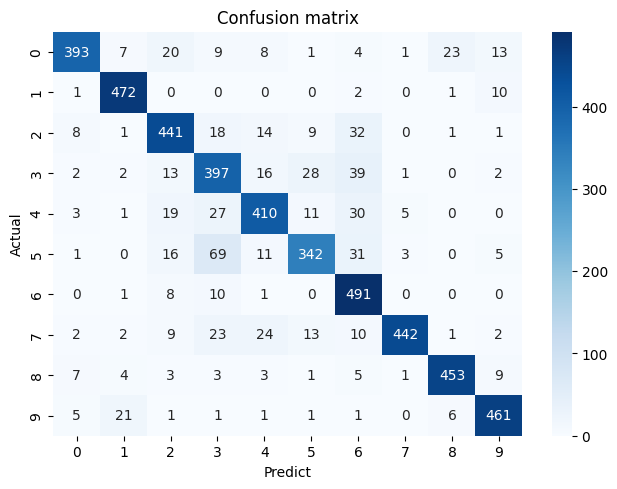

In [24]:
predictions = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, predictions)
plt_confusion_matrix(cm)

In [25]:
#Classification Report
print(classification_report(y_test, predictions, target_names=labels))

              precision    recall  f1-score   support

    airplane       0.93      0.82      0.87       479
  automobile       0.92      0.97      0.95       486
        bird       0.83      0.84      0.84       525
         cat       0.71      0.79      0.75       500
        deer       0.84      0.81      0.82       506
         dog       0.84      0.72      0.77       478
        frog       0.76      0.96      0.85       511
       horse       0.98      0.84      0.90       528
        ship       0.93      0.93      0.93       489
       truck       0.92      0.93      0.92       498

    accuracy                           0.86      5000
   macro avg       0.87      0.86      0.86      5000
weighted avg       0.87      0.86      0.86      5000



In [26]:
# Evaluation with Keras training API
eval = model.evaluate(x=x_test, y=y_test)

157/157 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.8604


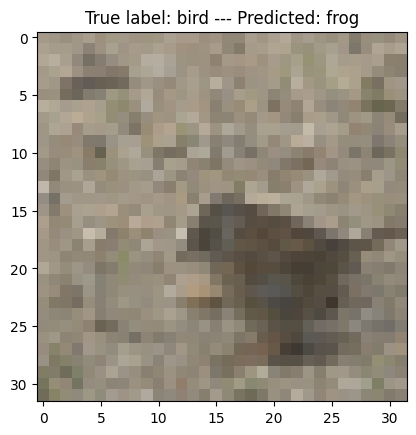

In [27]:
# Show some misclassified examples
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i])
plt.title("True label: %s --- Predicted: %s" % (labels[y_test[i]], labels[predictions[i]]));